In [1]:
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib.colors import to_hex
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import clustergraph.clustergraph as cg
from sklearn.preprocessing import StandardScaler

from clustergraph.utils import get_clusters_from_scikit
df = pd.read_csv("data/mice_protein_no_NaN.csv")

def get_learning_outcome(lab):
    if lab == "c-CS-s" or lab == "c-CS-m":
        return "Normal"

    elif lab == "t-CS-s":
        return "Failed"

    elif lab == "t-CS-m":
        return "Rescued"

    else:
        return "No_learning"

labels = [get_learning_outcome(lab) for lab in df["class"]]
X = df.iloc[:, :-1]

X = X.to_numpy()
scale = StandardScaler()
X = scale.fit_transform(X)
print(X.shape)
df

(1080, 77)


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.122652,0.132539,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.116682,0.132539,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.118508,0.132539,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132781,0.132539,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.129954,0.132539,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.190483,0.137082,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,t-SC-s
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.190463,0.137082,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,t-SC-s
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.216682,0.137082,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,t-SC-s
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.222263,0.137082,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,t-SC-s


# ClusterGraph with labels : Outcome of the experiment

In [2]:
import matplotlib
import matplotlib.pyplot as plt

def generate_labels_colors(num):
    tab10_colors = plt.cm.get_cmap("tab10", num)(np.arange(num))
    colors_hex = [matplotlib.colors.to_hex(color) for color in tab10_colors]
    return colors_hex

unique_labels = np.unique(labels)
labels_colors = generate_labels_colors(len(unique_labels))

labels_color_dict = dict(zip(unique_labels, labels_colors))
labels_hexa = [labels_color_dict[l] for l in labels]
clusters_hexa = np.array(labels_hexa)


import matplotlib.patches as mpatches
keys = list(labels_color_dict)
patches = [mpatches.Patch(color=labels_color_dict[k], label=k) for k in keys]

C:\Users\mathi\AppData\Local\Temp\ipykernel_24360\1742300999.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10_colors = plt.cm.get_cmap("tab10", num)(np.arange(num))


In [3]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

print(np.sum(pca.explained_variance_ratio_))
model = KMeans(20, random_state=42)
pred = model.fit_predict(X_pca)

0.9511488402863809


C:\Users\mathi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mathi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


## ClusterGraph's creation and connectivity pruning

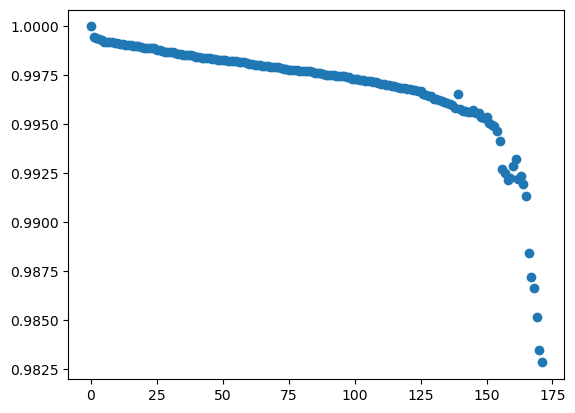

In [4]:
cluster_g = cg.ClusterGraph(
    clusters=get_clusters_from_scikit(pred), X=X_pca, metric_clusters="average"
)
cluster_g.fit_graph(node_type_coloring="label", node_color_labels=clusters_hexa)
connectivity_graph, conn=cluster_g.prune_conn(score=True)

plt.scatter(range(len(conn)), conn)

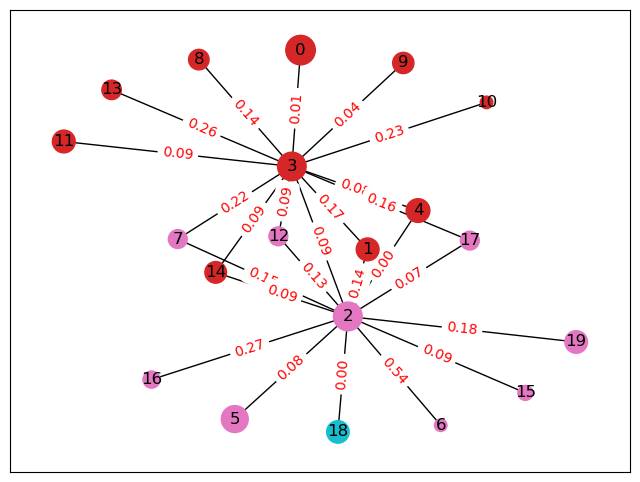

In [5]:
import clustergraph.plot_graph as pg
connectivity_graph = cluster_g.prune_conn(nb_edge_pruned=165)
pg.plot_colored_graph(connectivity_graph, size_nodes=1500, random_state=42)

## Metric distortion

Creation of the k-nearest neighbors graph

In [6]:
from sklearn.neighbors import NearestNeighbors
import networkx as nx

nb = 10
neigh = NearestNeighbors(n_neighbors=nb, radius=1)
neigh.fit(X=X)
nn_adjacency = neigh.kneighbors_graph(X=X, n_neighbors=nb, mode="distance")
nn_Graph = nx.from_scipy_sparse_array(nn_adjacency, edge_attribute="label")

for node in nn_Graph.nodes:
    nn_Graph.remove_edge(node, node)

print("Number connected components : ", nx.number_connected_components(nn_Graph))

Number connected components :  1


### Metric distortion pruning

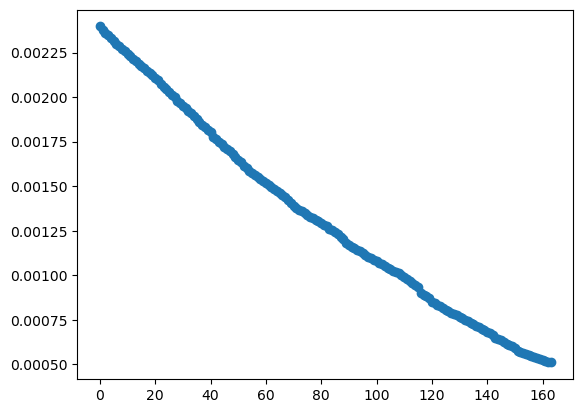

In [7]:
metric_distortion_graph, md = cluster_g.prune_distortion(nn_Graph, score=True)
plt.scatter(range(len(md)), md)

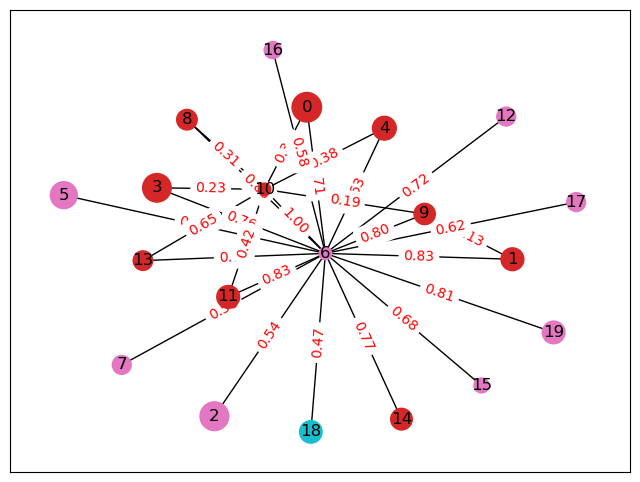

In [8]:
import clustergraph.plot_graph as pg
pg.plot_colored_graph(metric_distortion_graph, size_nodes=1500, random_state=42)

### Old

In [ ]:
from clustergraph.GraphPruning import GraphPruning
import matplotlib.pyplot as plt
from clustergraph.c_GraphPreprocess import GraphPreprocess
import clustergraph.plot_graph as pg

plt.close("all")

g_prepro_md = GraphPreprocess(cluster_g.graph)
clusters_hexa = np.array(labels_hexa)
g_prepro_md.fit_nodes(type_coloring="label", color_labels=clusters_hexa)
g_prepro_md.fit_edges()
g_md = g_prepro_md.graph

gp_md = GraphPruning(g_md, type_pruning="md", knn_g=nn_Graph, algo="bf")
md_pruned_gg, md = gp_md.prune(score=True)

plt.scatter(range(len(md)), md)

In [ ]:
%matplotlib notebook
plt.close('all')
slid = pg.plot_slider_graph( md_pruned_gg , reverse = False, random_state = None, weight = 'label' , max_node_size = 800, min_node_size = 100, 
                       weight_shown = "weight_plot" )

In [ ]:
%matplotlib inline
plt.close('all')
pg.plot_pie( md_pruned_gg, variable="weight_plot", size_nodes = 0.06, font_size = 8 , random_state = 42)
plt.legend(handles=patches)

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

pos = nx.spring_layout(md_pruned_gg, seed=42, iterations=100, scale=1, center=(0, 0))
edge_colors = [data["color"] for _, _, data in md_pruned_gg.edges(data=True)]
nx.draw_networkx_edges(md_pruned_gg, pos=pos, edge_color=edge_colors, ax=ax)

edge_labels = {
    (u, v): "{:.1f}".format(data["weight_plot"])
    for u, v, data in md_pruned_gg.edges(data=True)
}
nx.draw_networkx_edge_labels(
    md_pruned_gg, pos, edge_labels=edge_labels, font_color="black", font_size=9, ax=ax
)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

for node, data in md_pruned_gg.nodes(data=True):

    attributes = md_pruned_gg.nodes[node]["data_perc_labels"]
    keys = list(attributes)
    attrs = [attributes[k] for k in keys]

    ax.pie(
        attrs,
        center=pos[node],
        colors=[k for k in keys],
        radius=max(data["size_plot"] * 0.2, 0.03),
        frame=True,
    )


plt.legend(handles=patches, loc="upper left")

ax.set_aspect("auto")
xlim = (xlim[0] * 0.9, xlim[1] * 0.9)
ax.set_xlim(xlim)
ax.set_ylim((-(xlim[1] - xlim[0]) / 2, (xlim[1] - xlim[0]) / 2))

plt.tight_layout()
#plt.savefig("mice_GC.pdf")
plt.show()

# Other methods

In [ ]:
import umap as um

uma = um.UMAP(n_neighbors=15, random_state=1)
X_umap = uma.fit_transform(X)

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters_hexa)
plt.legend(handles=patches)
plt.tight_layout()
#plt.savefig("mice_umap.pdf")

In [ ]:
import umap as um

uma = um.UMAP(n_neighbors=15, random_state=42)
X_umap = uma.fit_transform(X)

import matplotlib.pyplot as plt

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters_hexa)
plt.legend(handles=patches)

In [ ]:
import pandas as pd
import numpy as np
import phate
import scprep

phate_operator = phate.PHATE(n_jobs=-2)

X_phate = phate_operator.fit_transform(X)
fig, ax = plt.subplots(figsize=(7, 7))


ax.scatter(X_phate[:, 0], X_phate[:, 1], c=clusters_hexa)
plt.legend(handles=patches)
# plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
#plt.savefig("mice_phate.pdf")
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tnse = tsne.fit_transform(X)


fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(X_tnse[:, 0], X_tnse[:, 1], c=clusters_hexa)
plt.legend(handles=patches)

plt.tight_layout()
#plt.savefig("mice_tsne.pdf")
plt.show()

## All combined

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

pos = nx.spring_layout(md_pruned_gg, seed=42, iterations=100, scale=1, center=(0, 0))
nx.draw_networkx_edges(md_pruned_gg, pos=pos, edge_color=edge_colors, ax=axs[0, 0])

edge_labels = {
    (u, v): "{:.1f}".format(data["weight_plot"])
    for u, v, data in md_pruned_gg.edges(data=True)
}
nx.draw_networkx_edge_labels(
    md_pruned_gg,
    pos,
    edge_labels=edge_labels,
    font_color="black",
    font_size=9,
    ax=axs[0, 0],
)

xlim = axs[0, 0].get_xlim()
ylim = axs[0, 0].get_ylim()

for node, data in md_pruned_gg.nodes(data=True):

    attributes = md_pruned_gg.nodes[node]["data_perc_labels"]
    keys = list(attributes)
    attrs = [attributes[k] for k in keys]

    axs[0, 0].pie(
        attrs,
        center=pos[node],
        colors=[k for k in keys],
        radius=max(data["size_plot"] * 0.2, 0.03),
        frame=True,
    )


axs[0, 0].legend(handles=patches, loc="upper left")

axs[0, 0].set_aspect("auto")
xlim = (xlim[0] * 0.9, xlim[1] * 0.9)
axs[0, 0].set_xlim(xlim)
axs[0, 0].set_ylim((-(xlim[1] - xlim[0]) / 2, (xlim[1] - xlim[0]) / 2))


axs[0, 0].set_title("(a) ClusterGraph", fontname="serif", family="cmr10", size=18)

axs[0, 1].scatter(X_umap[:, 0], X_umap[:, 1], c=clusters_hexa)
axs[0, 1].set_title("(b) UMAP", fontname="serif", family="cmr10", size=18)


axs[1, 0].scatter(X_tnse[:, 0], X_tnse[:, 1], c=clusters_hexa)
axs[1, 0].set_title("(c) t-SNE", fontname="serif", family="cmr10", size=18)

axs[1, 1].scatter(X_phate[:, 0], X_phate[:, 1], c=clusters_hexa)
axs[1, 1].set_title("(d) PHATE", fontname="serif", family="cmr10", size=18)

plt.tight_layout()
#plt.savefig("mice.pdf")